In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.stats import skewnorm
from scipy.stats import exponnorm
from customplotting.general import plot_xy, save_fig
from functions import *
from pynverse import inversefunc
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

In [2]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

In [31]:
# function dn/dt
def photoluminescence(t, k1):
    def model(n, t):
        k2 = 2e-10
        dndt = -(k2*(n**2) + k1*n)
        return dndt
    n0 = np.tile(np.power(10, 14), 50)
    n = odeint(model, n0, t)
    k2 = 2e-10
    pl = k2 * (n ** 2)
    return pl

In [32]:
pl = photoluminescence(t = np.linspace(0,1000)*1e-9, k1= np.logspace(5, 7, 50))

In [33]:
pl

array([[2.00000000e+18, 2.00000000e+18, 2.00000000e+18, ...,
        2.00000000e+18, 2.00000000e+18, 2.00000000e+18],
       [1.99023002e+18, 1.98942986e+18, 1.98855121e+18, ...,
        1.42500419e+18, 1.37830167e+18, 1.32875930e+18],
       [1.98051171e+18, 1.97891984e+18, 1.97717258e+18, ...,
        1.01543732e+18, 9.49977901e+17, 8.82921137e+17],
       ...,
       [1.59210383e+18, 1.56254993e+18, 1.53071392e+18, ...,
        2.48434884e+11, 5.18918093e+10, 9.28818361e+09],
       [1.58446562e+18, 1.55443884e+18, 1.52210676e+18, ...,
        1.77143292e+11, 3.57879252e+10, 6.17543715e+09],
       [1.57686682e+18, 1.54637274e+18, 1.51355104e+18, ...,
        1.26309746e+11, 2.46816527e+10, 4.10586462e+09]])

In [34]:
t = np.linspace(0,1000)*1e-9

In [35]:
def pl_average(pl):
    pl_sum = pl.sum(axis=-1) # weights for pl
    pl_average = np.average(pl, weights=pl_sum, axis=-1)
    return pl_average

In [36]:
pl_avg = pl_average(pl)

In [37]:
pl_avg

array([2.00000000e+18, 1.88520718e+18, 1.78920508e+18, 1.70768805e+18,
       1.63747306e+18, 1.57618623e+18, 1.52204086e+18, 1.47367924e+18,
       1.43005945e+18, 1.39037375e+18, 1.35398951e+18, 1.32040608e+18,
       1.28922315e+18, 1.26011740e+18, 1.23282503e+18, 1.20712876e+18,
       1.18284792e+18, 1.15983096e+18, 1.13794969e+18, 1.11709476e+18,
       1.09717225e+18, 1.07810090e+18, 1.05980993e+18, 1.04223733e+18,
       1.02532844e+18, 1.00903485e+18, 9.93313449e+17, 9.78125693e+17,
       9.63436952e+17, 9.49215998e+17, 9.35434565e+17, 9.22066981e+17,
       9.09089850e+17, 8.96481788e+17, 8.84223194e+17, 8.72296051e+17,
       8.60683759e+17, 8.49370984e+17, 8.38343531e+17, 8.27588233e+17,
       8.17092848e+17, 8.06845974e+17, 7.96836975e+17, 7.87055907e+17,
       7.77493462e+17, 7.68140911e+17, 7.58990057e+17, 7.50033191e+17,
       7.41263055e+17, 7.32672803e+17])

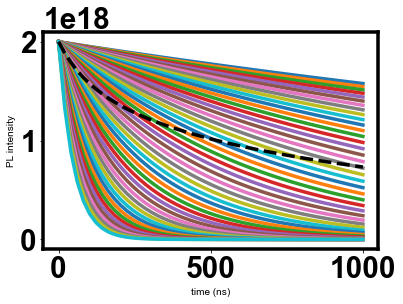

In [38]:
plt.plot(t*1e9, pl)
plt.plot(t*1e9, pl_avg,'k--', label="Average")
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

In [39]:
stretched_exp = stretch_exp_fit(pl_avg/np.max(pl_avg), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

tau_c (ns) = 924.3457545963556
Beta = 0.5792407489448356
avg. tau (ns) = 1458.40018843065


In [40]:
double_exp = double_exp_fit(pl_avg/np.max(pl_avg), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

tau1 (ns) = 140.53628453920544
a1 = 0.3016369625409625
tau2 (ns) = 1557.016150876115
a2 = 0.6899608801187608
avg. tau (ns) = 1126.1331194686804


In [41]:
triple_exp = triple_exp_fit(pl_avg/np.max(pl_avg), t)
print("tau1 (ns) = "+str(triple_exp[0]*1e9))
print("a1 = "+str(triple_exp[1]))
print("tau2 (ns) = "+str(triple_exp[2]*1e9))
print("a2 = "+str(triple_exp[3]))
print("tau3 (ns) = "+str(triple_exp[4]*1e9))
print("a3 (ns) = "+str(triple_exp[5]))
print("avg. tau (ns) = "+str(triple_exp[6]*1e9))

tau1 (ns) = 74.51241886447582
a1 = 0.1333860297398487
tau2 (ns) = 278.7383851597989
a2 = 0.2664134228876319
tau3 (ns) = 1945.2724149977564
a3 (ns) = 0.6000061591873795
avg. tau (ns) = 1251.6172929092586


In [42]:
single_exp = single_exp_fit(pl_avg/np.max(pl_avg), t)
print("tau (ns) = "+str(single_exp[0]*1e9))
print("a = "+str(single_exp[1]))
print("avg. tau (ns) = "+str(single_exp[2]*1e9))

tau (ns) = 1058.1167082633622
a = 0.8566463124724878
avg. tau (ns) = 1058.1167082633622


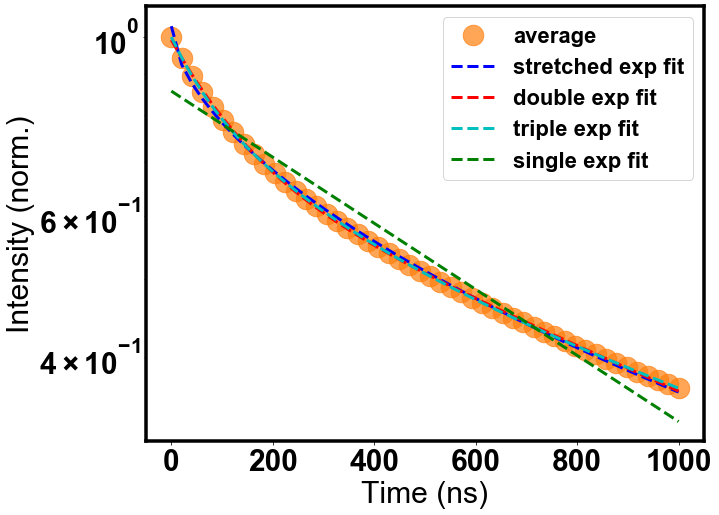

In [43]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_avg/np.max(pl_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, triple_exp[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)

#### Calculation of theoretical tau : I = I0e^(-t/tau) when t = tau : I = I0/e

In [44]:
def PL_e(database):
    all_PL_e = np.array([])
    for row in database:
        PL_e = np.max(row)/2.718281
        all_PL_e = np.append(all_PL_e, PL_e) 
    return all_PL_e

In [45]:
PL_e_values = PL_e(pl)

In [46]:
PL_e_values

array([7.35759107e+17, 7.32164931e+17, 7.28589765e+17, 7.25033498e+17,
       7.21496019e+17, 7.17977219e+17, 7.14476988e+17, 7.10995219e+17,
       7.07531803e+17, 7.04086635e+17, 7.00659607e+17, 6.97250615e+17,
       6.93859553e+17, 6.90486317e+17, 6.87130805e+17, 6.83792912e+17,
       6.80472538e+17, 6.77169581e+17, 6.73883940e+17, 6.70615514e+17,
       6.67364205e+17, 6.64129913e+17, 6.60912541e+17, 6.57711991e+17,
       6.54528166e+17, 6.51360969e+17, 6.48210306e+17, 6.45076080e+17,
       6.41958198e+17, 6.38856566e+17, 6.35771090e+17, 6.32701679e+17,
       6.29648239e+17, 6.26610679e+17, 6.23588909e+17, 6.20582838e+17,
       6.17592377e+17, 6.14617436e+17, 6.11657927e+17, 6.08713762e+17,
       6.05784853e+17, 6.02871114e+17, 5.99972458e+17, 5.97088800e+17,
       5.94220053e+17, 5.91366135e+17, 5.88526960e+17, 5.85702444e+17,
       5.82892506e+17, 5.80097061e+17])

I cannot do a weighted average of this because tau_theory is a 1D array

In [47]:
# numpy average of PL_max/e values
PL_e_average = np.average(PL_e_values)

In [48]:
PL_e_average

6.54670976355969e+17

In [96]:
x_values = np.array([])
for row in pl:
    for i in PL_e_values:
        x_values = np.append(x_values, np.interp(i, row, t))

In [97]:
x_values

array([0.e+00, 0.e+00, 0.e+00, ..., 1.e-06, 1.e-06, 1.e-06])

In [98]:
x_values.size

2500

In [99]:
PL_e_values.size

50

ValueError: x and y must be the same size

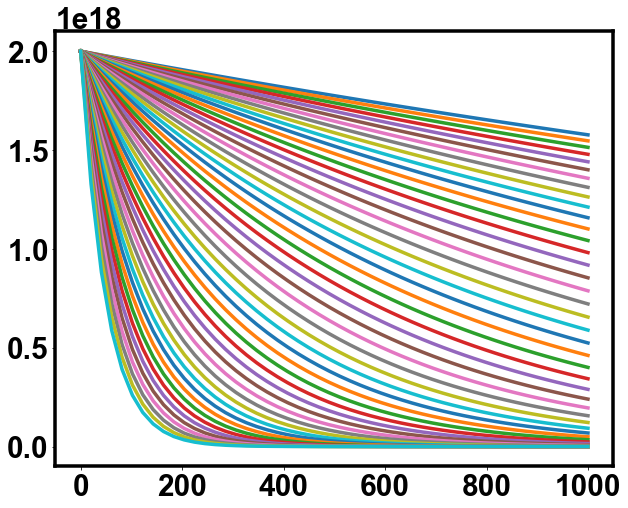

In [90]:
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl)
plt.scatter(x_values*1e9, PL_e_values)

In [81]:
x_values_avg = np.average(x_values)

In [82]:
x_values_avg

9.388000000000004e-07

<BarContainer object of 1 artists>

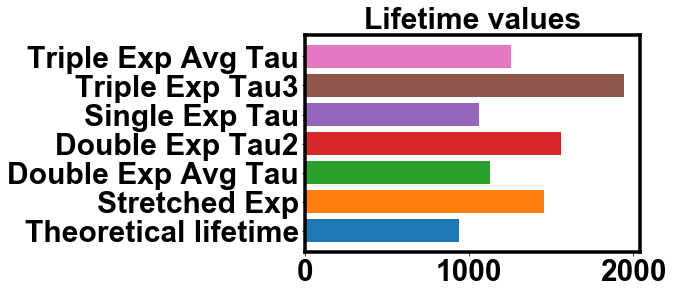

In [84]:
#plot of different tau values, from mathematical calculation (reference) and fitting functions
plt.figure()
plt.title("Lifetime values", fontsize=30, fontweight="bold")
plt.barh("Theoretical lifetime", x_values_avg*1e9)
plt.barh("Stretched Exp", stretched_exp[3]*1e9)
plt.barh("Double Exp Avg Tau", double_exp[4]*1e9)
plt.barh("Double Exp Tau2", double_exp[2]*1e9)
plt.barh("Single Exp Tau", single_exp[2]*1e9)
plt.barh("Triple Exp Tau3", triple_exp[4]*1e9)
plt.barh("Triple Exp Avg Tau", triple_exp[6]*1e9)

### k1 skewed gaussian distribution
Simple continuity equation considering just the radiative (k2) and defect-assisted non-radiative recombination (k1)
* k1 = skewed distribution with maximum at 1e6 ns and a size of 50 data points
* k2 = 2e-10 cm^3 s^-1
* n0 = 1e14
* t = 0 to 1000 ns

In [24]:
# skewed gaussian distribution of k1 values
# search for log spaced skewed distribution
skew = skewnorm.rvs(a = 10, loc = 1e6, scale=10000000, size=50)

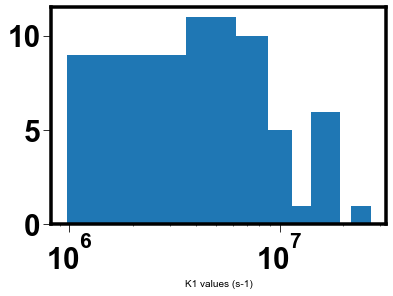

In [25]:
plt.figure()
plt.tick_params(length=8)
plt.hist(skew)
plt.xlabel("K1 values (s-1)")
plt.xscale("log")

In [26]:
pl_skew = photoluminescence(k1= skew, n0 = np.tile(np.power(10, 15), 50), t = np.linspace(0,1000)*1e-9)

In [27]:
pl_skew_avg = pl_average(pl_skew)

take lifetime for each of the decay 1/e of max PL, then weighted average of these lifetimes --> compare it to the avg_tau from fitting --> plot the difference -->focus on comparing the tau 1 and tau 2 from biexp, and all others

(add noise to functions?)

SRV for each decay and then wigthed average , compare to the SRV of avg tau from fitting and average decay

beta tells us about the k1 distribution --> show that this is the physical meaning a change in beta is reflexed in a change in k1 --> more homogeneous than beta is closer to 1 
1) k1 : uniform distribution --> should get beta values closer to 1
2) our skewed distribution --> lower beta
3) from 1e5 to 1e7 see if beta becomes closer to 0

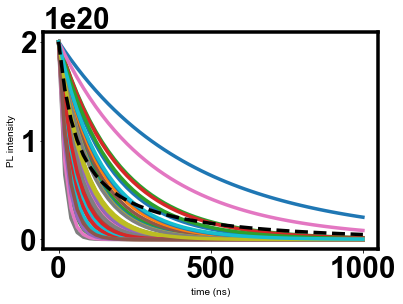

In [28]:
plt.plot(t*1e9, pl_skew)
plt.plot(t*1e9, pl_skew_avg,'k--', label="Average")
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

In [29]:
stretched_exp_skew = stretch_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau_c (ns) = "+str(stretched_exp_skew[0]*1e9))
print("Beta = "+str(stretched_exp_skew[1]))
print("avg. tau (ns) = "+str(stretched_exp_skew[3]*1e9))

tau_c (ns) = 95.83568694827123
Beta = 0.5689798129079504
avg. tau (ns) = 155.09375863000614


In [30]:
double_exp_skew = double_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(double_exp_skew[0]*1e9))
print("a1 = "+str(double_exp_skew[1]))
print("tau2 (ns) = "+str(double_exp_skew[2]*1e9))
print("a2 = "+str(double_exp_skew[3]))
print("avg. tau (ns) = "+str(double_exp_skew[4]*1e9))

tau1 (ns) = 62.717219004243205
a1 = 0.6583256681925117
tau2 (ns) = 380.54824524288796
a2 = 0.31338064621098183
avg. tau (ns) = 165.21947808414768


In [31]:
triple_exp_skew = triple_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(triple_exp_skew[0]*1e9))
print("a1 = "+str(triple_exp_skew[1]))
print("tau2 (ns) = "+str(triple_exp_skew[2]*1e9))
print("a2 = "+str(triple_exp_skew[3]))
print("tau3 (ns) = "+str(triple_exp_skew[4]*1e9))
print("a3 (ns) = "+str(triple_exp_skew[5]))
print("avg. tau (ns) = "+str(triple_exp_skew[6]*1e9))

tau1 (ns) = 116.89540996159232
a1 = 0.3780470984066537
tau2 (ns) = 441.06401952825877
a2 = 0.23624082670024882
tau3 (ns) = 36.328490836401606
a3 (ns) = 0.384530870068582
avg. tau (ns) = 162.55073105147332


In [32]:
single_exp_skew = single_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau (ns) = "+str(single_exp_skew[0]*1e9))
print("a = "+str(single_exp_skew[1]))
print("avg. tau (ns) = "+str(single_exp_skew[2]*1e9))

tau (ns) = 252.79986586275913
a = 0.6519988053010165
avg. tau (ns) = 252.79986586275913


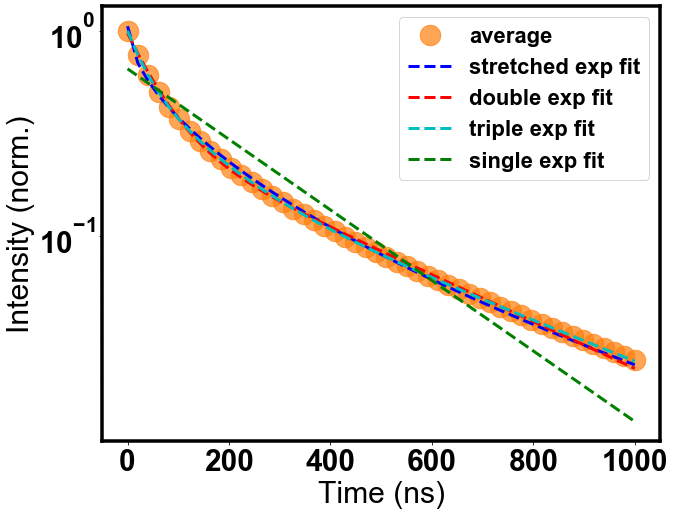

In [33]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_skew_avg/np.max(pl_skew_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp_skew[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp_skew[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, triple_exp_skew[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp_skew[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)

In [74]:
skew_log= skewnorm.logpdf(skew, a=10)

In [75]:
skew_log

array([-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf])

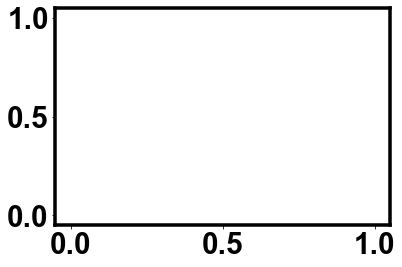

In [76]:
plt.plot(t*1e9, skew_log)

In [72]:
np.logspace(6, 7)

array([ 1000000.        ,  1048113.13415469,  1098541.14198756,
        1151395.39932645,  1206792.64063933,  1264855.2168553 ,
        1325711.36559011,  1389495.49437314,  1456348.47750124,
        1526417.96717523,  1599858.71960606,  1676832.93681101,
        1757510.62485479,  1842069.96932672,  1930697.72888325,
        2023589.64772516,  2120950.88792019,  2222996.4825262 ,
        2329951.81051537,  2442053.09454865,  2559547.92269953,
        2682695.79527973,  2811768.69797423,  2947051.70255181,
        3088843.59647748,  3237457.54281765,  3393221.77189533,
        3556480.30622313,  3727593.72031494,  3906939.93705462,
        4094915.06238043,  4291934.26012878,  4498432.66896944,
        4714866.36345739,  4941713.36132384,  5179474.67923121,
        5428675.43932386,  5689866.02901829,  5963623.31659464,
        6250551.92527398,  6551285.56859551,  6866488.450043  ,
        7196856.73001151,  7543120.06335462,  7906043.2109077 ,
        8286427.72854684,  8685113.73751

In [78]:
vals = skewnorm.ppf([0.001, 0.5, 0.999], a=10)

In [79]:
vals

array([-0.18416637,  0.67448975,  3.29052673])

In [91]:
x = np.linspace(skewnorm.ppf(1e6, 4), skewnorm.ppf(1e7, 4), 100)

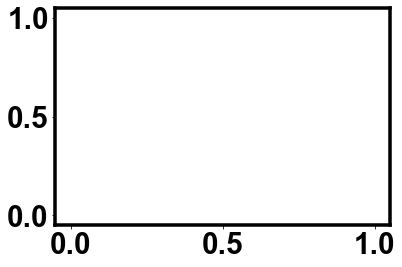

In [93]:
plt.plot(x, skewnorm.pdf(x, 100),'r-', lw=5, alpha=0.6, label='skewnorm pdf')

In [146]:
skew = skewnorm.rvs(a = 20, loc = 1e6, scale=1e7, size=50)

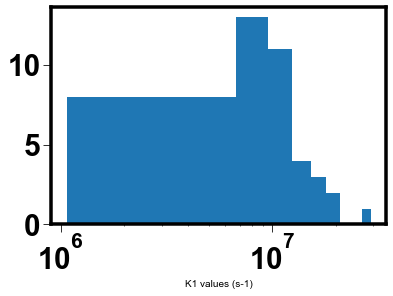

In [147]:
plt.figure()
plt.tick_params(length=8)
plt.hist(skew)
plt.xlabel("K1 values (s-1)")
plt.xscale("log")

In [148]:
pl_skew = photoluminescence(k1= skew, n0 = np.tile(np.power(10, 14), 50), t = np.linspace(0,1000)*1e-9)

In [149]:
pl_skew_avg = pl_average(pl_skew)

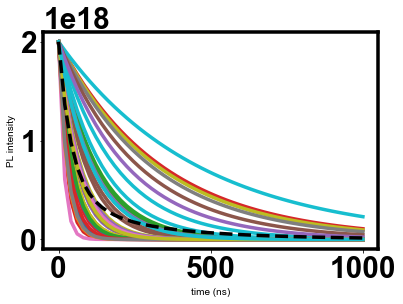

In [150]:
plt.plot(t*1e9, pl_skew)
plt.plot(t*1e9, pl_skew_avg,'k--', label="Average")
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

In [151]:
stretched_exp_skew = stretch_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau_c (ns) = "+str(stretched_exp_skew[0]*1e9))
print("Beta = "+str(stretched_exp_skew[1]))
print("avg. tau (ns) = "+str(stretched_exp_skew[3]*1e9))

tau_c (ns) = 50.073088144858254
Beta = 0.5456179944002922
avg. tau (ns) = 86.31230941310211


In [152]:
double_exp_skew = double_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(double_exp_skew[0]*1e9))
print("a1 = "+str(double_exp_skew[1]))
print("tau2 (ns) = "+str(double_exp_skew[2]*1e9))
print("a2 = "+str(double_exp_skew[3]))
print("avg. tau (ns) = "+str(double_exp_skew[4]*1e9))

tau1 (ns) = 47.670363528338754
a1 = 0.7914561503015916
tau2 (ns) = 295.49699668364843
a2 = 0.18992062721601322
avg. tau (ns) = 95.6309335030495


In [153]:
triple_exp_skew = triple_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(triple_exp_skew[0]*1e9))
print("a1 = "+str(triple_exp_skew[1]))
print("tau2 (ns) = "+str(triple_exp_skew[2]*1e9))
print("a2 = "+str(triple_exp_skew[3]))
print("tau3 (ns) = "+str(triple_exp_skew[4]*1e9))
print("a3 (ns) = "+str(triple_exp_skew[5]))
print("avg. tau (ns) = "+str(triple_exp_skew[6]*1e9))

tau1 (ns) = 36.4493816255654
a1 = 0.5997713050188247
tau2 (ns) = 94.66100238464095
a2 = 0.25600536234822036
tau3 (ns) = 334.05195740242453
a3 (ns) = 0.14356687763971654
avg. tau (ns) = 94.11559654741713


In [154]:
single_exp_skew = single_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau (ns) = "+str(single_exp_skew[0]*1e9))
print("a = "+str(single_exp_skew[1]))
print("avg. tau (ns) = "+str(single_exp_skew[2]*1e9))

tau (ns) = 176.40386228869292
a = 0.5951184547120444
avg. tau (ns) = 176.40386228869292


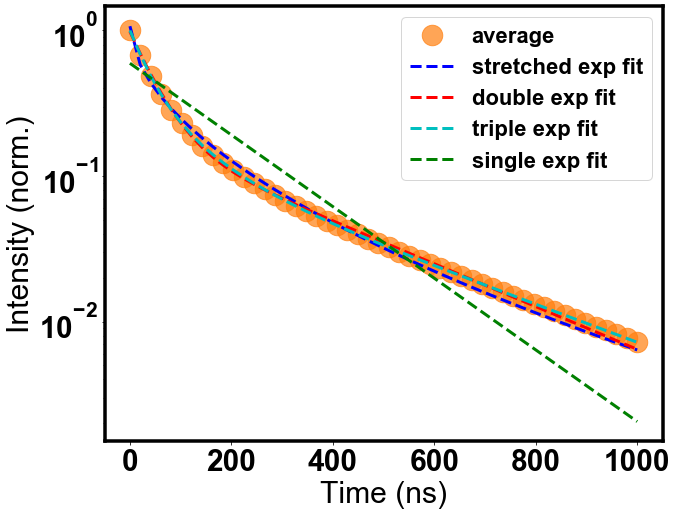

In [155]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_skew_avg/np.max(pl_skew_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp_skew[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp_skew[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, triple_exp_skew[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp_skew[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)